# Quantum kinetic equation on square lattice

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

### Runge-Kutta integrator

In [2]:
def runge_kutta_step(y,y_dot,t,dt):
    a1 = y_dot(y,t)
    a2 = y_dot(y+a1*0.5*dt,t+0.5*dt)
    a3 = y_dot(y+a2*0.5*dt,t+0.5*dt)    
    a4 = y_dot(y+a3*dt,t+dt)
    return y + dt/6.*(a1+a4) + dt/3.*(a2+a3)
  
def runge_kutta(y0,y_dot,ts):
    ys = np.empty((*ts.shape,*y0.shape),dtype=complex)
    ys[0] = y0
    dt = ts[1]-ts[0]
    for i in tqdm(range(len(ts)-1),leave=False):
        ys[i+1] = runge_kutta_step(ys[i],y_dot,ts[i],dt)
    return ys

### Mesh of Brillouin zone

In [3]:
d_kx,d_ky = 0.1,0.1
kx_lim = (-np.pi,np.pi)
ky_lim = (-np.pi,np.pi)
Nx = int((kx_lim[1]-kx_lim[0])/d_kx)
Ny = int((ky_lim[1]-ky_lim[0])/d_ky)
kxv = np.linspace(*kx_lim,Nx,endpoint=False)
kyv = np.linspace(*ky_lim,Ny,endpoint=False)
kx,ky = np.meshgrid(kxv,kyv,indexing='ij')

### Band structure

In [4]:
def ek(kx,ky):
    return -2*np.cos(kx)-2*np.cos(ky)+3
def vk(kx,ky):
    return np.array([2*np.sin(kx),2*np.sin(ky)])

### Equilibrium density matrix

In [5]:
def rhoEq(kx,ky,temp=0.1):
    return 1/(1+np.exp(ek(kx,ky)/temp))

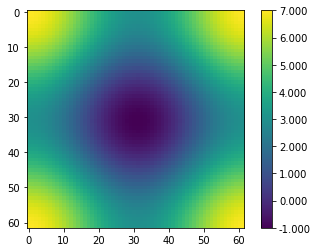

In [8]:
levels = [-1,-0.9,0,0.9,1]
#plt.contourf(kx,ky,ek(kx,ky),cmap='seismic',levels=levels)
plt.imshow(ek(kx,ky))
plt.colorbar(format='%.3f')

### Quantum kinetic equation

In [9]:
def rhoDot(rho,kx,ky,temp=0.1,tau=0.1):
    return -(rho-rhoEq(kx,ky,temp))/tau

In [10]:
def quantumKinetic(kx,ky,vec_pot,time,temp=0.1,tau=0.1):

    rho_0 = rhoEq(kx,ky,temp)
    rho_dot = lambda rho,t: rhoDot(rho,kx-vec_pot(t)[0],ky-vec_pot(t)[1],temp,tau)
  
    return runge_kutta(rho_0,rho_dot,time)

In [11]:
time = np.arange(0,10,0.1)
vec_pot = lambda t: (-5*t,2*t)

In [12]:
rho = quantumKinetic(kx,ky,vec_pot,time)

In [13]:
kx_ = np.array([kx-vec_pot(t)[0] for t in time])
ky_ = np.array([ky-vec_pot(t)[1] for t in time])

In [14]:
kx2 = np.mod(kx_+np.pi,2*np.pi)-np.pi
ky2 = np.mod(ky_+np.pi,2*np.pi)-np.pi

In [15]:
nmesh = np.array([np.meshgrid(kx2[i,:,0].argsort(),ky2[i,0,:].argsort(),indexing='ij') for i in range(len(time))])

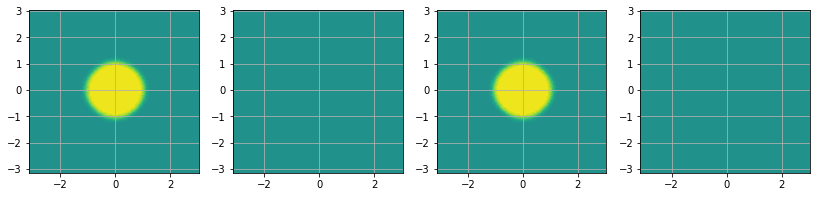

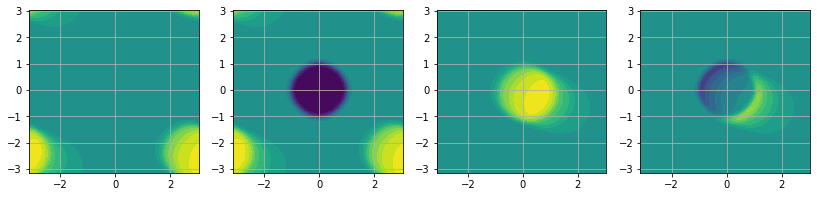

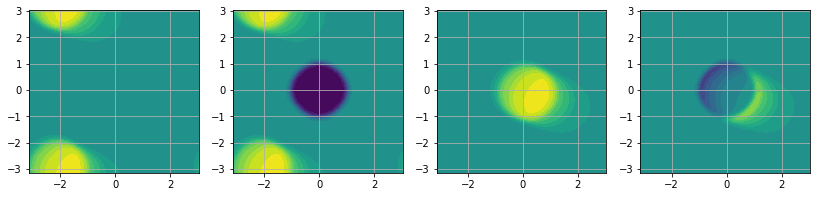

In [16]:
levels = np.linspace(-1,1,20,endpoint=True)
for i in [0,20,80]:
    plt.figure(figsize=(14,3))
    plt.subplot(141)
    plt.contourf(kx,ky,rho[i].real,levels=levels)
    plt.grid()
    plt.subplot(142)
    plt.contourf(kx,ky,rho[i].real-rho[0].real,levels=levels)
    plt.grid()
    plt.subplot(143)
    plt.contourf(kx,ky,rho[i][nmesh[i,0],nmesh[i,1]].real,levels=levels)
    plt.grid()
    plt.subplot(144)
    plt.contourf(kx,ky,rho[i][nmesh[i,0],nmesh[i,1]].real-rho[0].real,levels=levels)
    plt.grid()